## 모듈 불러오기

In [1]:
import os, re, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Step 1. 데이터 다운로드

### Step 2. 데이터 읽어오기

In [2]:
txt_file_path = '../data/exploration_06/data/lyrics/*'
txt_list = glob.glob(txt_file_path)

In [3]:
print(len(txt_list))
print(np.array(txt_list[:3]))

49
['../data/exploration_06/data/lyrics/lin-manuel-miranda.txt'
 '../data/exploration_06/data/lyrics/bob-marley.txt'
 '../data/exploration_06/data/lyrics/lil-wayne.txt']


In [4]:
raw_corpus = []
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)
print(len(raw_corpus))
print(np.array(raw_corpus[:3]))

187088
['How does a bastard, orphan, son of a whore'
 'And a Scotsman, dropped in the middle of a forgotten spot in the Caribbean by providence impoverished,'
 'In squalor, grow up to be a hero and a scholar? The ten-dollar founding father without a father']


### Step 3. 데이터 정제

In [5]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

In [6]:
corpus = []
for sentence in raw_corpus:
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)

In [7]:
print(len(corpus))
print(max([len(sentence) for sentence in corpus]))

175749
1478


(array([9.3330e+04, 7.8055e+04, 4.0740e+03, 1.9400e+02, 4.9000e+01,
        1.8000e+01, 1.1000e+01, 1.0000e+00, 2.0000e+00, 6.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]),
 <BarContainer object of 29 artists>)

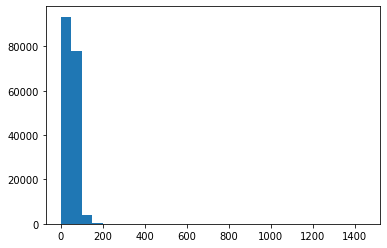

In [8]:
lengths = np.array([len(sentence) for sentence in corpus])
plt.hist(lengths,bins=range(0,1500,50))

### Step 4. 평가 데이터셋 분리

In [9]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=7000, filters=' ', oov_token="<unk>")
tokenizer.fit_on_texts(corpus)
tensor = tokenizer.texts_to_sequences(corpus)
print(type(tensor))
print(np.array(tensor)[:3])
print(np.array([len(sentence) for sentence in tensor]).max())
tensor = tf.keras.preprocessing.sequence.pad_sequences(
    tensor, padding = 'post',maxlen = 15, truncating = 'post')
print(type(tensor))
print(np.array(tensor)[:3])
print(tensor.shape)

<class 'list'>
[list([2, 78, 626, 9, 4376, 4, 5629, 4, 611, 19, 9, 3293, 3])
 list([2, 8, 9, 1, 4, 1372, 14, 6, 881, 19, 9, 1974, 808, 14, 6, 4179, 122, 1, 1, 4, 3])
 list([2, 14, 1, 4, 831, 29, 10, 27, 9, 2040, 8, 9, 1, 43, 6, 743, 1128, 1, 635, 258, 9, 635, 3])]
347


/tmp/ipykernel_413/668456425.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(tensor)[:3])


<class 'numpy.ndarray'>
[[   2   78  626    9 4376    4 5629    4  611   19    9 3293    3    0
     0]
 [   2    8    9    1    4 1372   14    6  881   19    9 1974  808   14
     6]
 [   2   14    1    4  831   29   10   27    9 2040    8    9    1   43
     6]]
(175749, 15)


In [10]:
print(len(corpus))
print(tensor.shape) #24015개의 문장, 각 문장은 21차원의 벡터
print(corpus[0])
print(corpus[1])
print(corpus[2])
print(tensor[0])
print(tensor[1])
print(tensor[2])

175749
(175749, 15)
<start> how does a bastard , orphan , son of a whore <end>
<start> and a scotsman , dropped in the middle of a forgotten spot in the caribbean by providence impoverished , <end>
<start> in squalor , grow up to be a hero and a scholar ? the ten dollar founding father without a father <end>
[   2   78  626    9 4376    4 5629    4  611   19    9 3293    3    0
    0]
[   2    8    9    1    4 1372   14    6  881   19    9 1974  808   14
    6]
[   2   14    1    4  831   29   10   27    9 2040    8    9    1   43
    6]


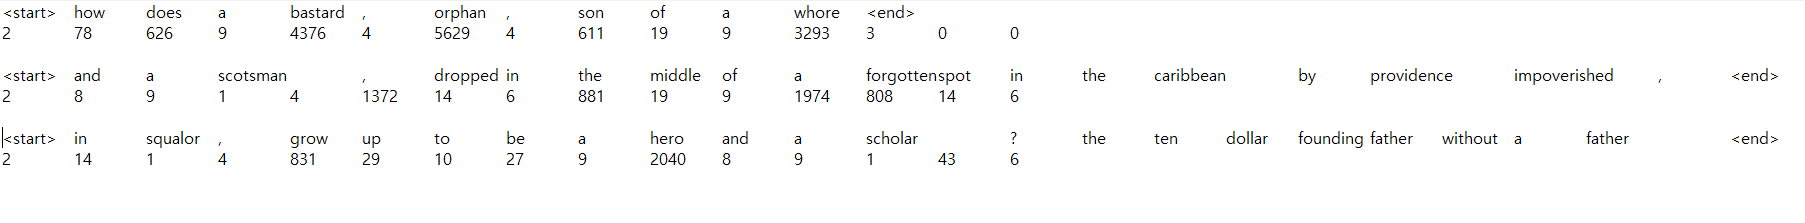

In [11]:
src_input = tensor[:, :-1]  
tgt_input = tensor[:, 1:]    
print(src_input[0])
print(tgt_input[0])

[   2   78  626    9 4376    4 5629    4  611   19    9 3293    3    0]
[  78  626    9 4376    4 5629    4  611   19    9 3293    3    0    0]


In [12]:
BUFFER_SIZE = len(src_input)
print('BUFFER_SIZE :',BUFFER_SIZE)
BATCH_SIZE = 256
print('BATCH_SIZE :',BATCH_SIZE)
steps_per_epoch = len(src_input) // BATCH_SIZE
print('steps_per_epoch :',steps_per_epoch)
VOCAB_SIZE = tokenizer.num_words + 1
print('VOCAB_SIZE :',VOCAB_SIZE)

BUFFER_SIZE : 175749
BATCH_SIZE : 256
steps_per_epoch : 686
VOCAB_SIZE : 7001


In [13]:
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset_as_np_array = np.array([data for data in dataset])
print(dataset_as_np_array.shape)
dataset = dataset.shuffle(BUFFER_SIZE)
dataset_as_np_array = np.array([data for data in dataset])
print(dataset_as_np_array.shape)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset_as_np_array = np.array([data for data in dataset])
print(dataset_as_np_array.shape)
print(dataset)

(175749, 2, 14)
(175749, 2, 14)
(686, 2, 256, 14)
<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>


### Step 5. 인공지능 만들기

In [14]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size) 
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)  
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out

In [15]:
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [16]:
for src_sample, tgt_sample in dataset.take(1): break
prd_sample = model(src_sample)
prd_sample.shape

TensorShape([256, 14, 7001])

In [17]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  1792256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  7176025   
Total params: 22,607,961
Trainable params: 22,607,961
Non-trainable params: 0
_________________________________________________________________


In [18]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy( 
    from_logits=True, reduction='none')

In [19]:
model.compile(loss=loss, optimizer=optimizer)
hist = model.fit(dataset, epochs=30)

Epoch 1/30
686/686 [==============================] - 94s 134ms/step - loss: 3.5286
Epoch 2/30
686/686 [==============================] - 92s 134ms/step - loss: 3.0585
Epoch 3/30
686/686 [==============================] - 92s 134ms/step - loss: 2.8722
Epoch 4/30
686/686 [==============================] - 92s 134ms/step - loss: 2.7348
Epoch 5/30
686/686 [==============================] - 92s 134ms/step - loss: 2.6203
Epoch 6/30
686/686 [==============================] - 92s 134ms/step - loss: 2.5185
Epoch 7/30
686/686 [==============================] - 92s 134ms/step - loss: 2.4243
Epoch 8/30
686/686 [==============================] - 92s 134ms/step - loss: 2.3356
Epoch 9/30
686/686 [==============================] - 92s 134ms/step - loss: 2.2504
Epoch 10/30
686/686 [==============================] - 92s 134ms/step - loss: 2.1676
Epoch 11/30
686/686 [==============================] - 92s 134ms/step - loss: 2.0880
Epoch 12/30
686/686 [==============================] - 92s 134ms/step - lo

In [20]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]
    while True:
        predict = model(test_tensor) 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [22]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you , i love you , i love you <end> '